<a href="https://colab.research.google.com/github/danielwhitt/FATE/blob/main/float_deployment_experiments_aug132024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install copernicusmarine
# need copernicus marine username and password
import copernicusmarine

copernicusmarine.subset(
  dataset_id="cmems_mod_glo_phy-cur_anfc_0.083deg_PT6H-i",
  variables=["uo", "vo"],
  minimum_longitude=-174,
  maximum_longitude=-150,
  minimum_latitude=1,
  maximum_latitude=12,
  start_datetime="2024-08-14T18:00:00",
  end_datetime="2024-08-17T18:00:00",
  minimum_depth=13,
  maximum_depth=14,
)
#500	2024-08-17 15:44:02 UTC target
#release target time 800 UTC-10 Aug 14



  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.3/91.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.9/182.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.2/210.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.3 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5033 sha256=a43b2ce2

Fetching catalog: 100%|██████████| 3/3 [00:24<00:00,  8.12s/it]
INFO - 2024-08-05T18:34:53Z - Dataset version was not specified, the latest one was selected: "202406"
INFO:copernicus_marine_root_logger:Dataset version was not specified, the latest one was selected: "202406"
INFO - 2024-08-05T18:34:53Z - Dataset part was not specified, the first one was selected: "default"
INFO:copernicus_marine_root_logger:Dataset part was not specified, the first one was selected: "default"
INFO - 2024-08-05T18:34:57Z - Service was not specified, the default one was selected: "arco-geo-series"
INFO:copernicus_marine_root_logger:Service was not specified, the default one was selected: "arco-geo-series"
WARNING - 2024-08-05T18:34:59Z - Some or all of your subset selection [2024-08-14 18:00:00, 2024-08-17 18:00:00] for the time dimension  exceed the dataset coordinates [2022-06-01 00:00:00, 2024-08-15 00:00:00]
INFO - 2024-08-05T18:34:59Z - Downloading using service arco-geo-series...
INFO:copernicus_mar

 Y


INFO - 2024-08-05T18:35:14Z - Writing to local storage. Please wait...
INFO:copernicus_marine_root_logger:Writing to local storage. Please wait...


  0%|          | 0/30 [00:00<?, ?it/s]

INFO - 2024-08-05T18:35:27Z - Successfully downloaded to cmems_mod_glo_phy-cur_anfc_0.083deg_PT6H-i_uo-vo_174.00W-150.00W_1.00N-12.00N_13.47m_2024-08-14-2024-08-15.nc
INFO:copernicus_marine_root_logger:Successfully downloaded to cmems_mod_glo_phy-cur_anfc_0.083deg_PT6H-i_uo-vo_174.00W-150.00W_1.00N-12.00N_13.47m_2024-08-14-2024-08-15.nc


PosixPath('cmems_mod_glo_phy-cur_anfc_0.083deg_PT6H-i_uo-vo_174.00W-150.00W_1.00N-12.00N_13.47m_2024-08-14-2024-08-15.nc')

In [2]:
!pip install parcels
!pip install cftime
!pip install cgen
!pip install trajan
!pip install zarr
!pip install pymbolic

import math
from datetime import timedelta
from operator import attrgetter

import matplotlib.pyplot as plt
import numpy as np
import trajan as ta
import xarray as xr
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

from parcels import (
    AdvectionRK4,
    FieldSet,
    JITParticle,
    ParticleSet,
    Variable,
    download_example_dataset,
)

import parcels as ps

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.4/104.4 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.6/145.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.2 MB/s eta 0:00:00
  Created wheel for cgen: filename=cgen-2020.1-py3-none-any.whl size=15821 sha256=4898b4b5bd3b965912f9ff4df27b152cbe7c9ad946c3ee66b77a81e1af6d3236
  Stored in directory: /root/.cache/pip/wheels/e6/64/97/7637a7ca9c143c1eaaeeb048c6e772677a68eb4d8695a9cc2a
  Created wheel for pymbolic: filename=pymbolic-2022.2-py3-none-any.whl size=127316 sha256=305966f7ec3df788af61d95b83fde4faddbdde82c8321c065d82af1da89dfad9
  Stored in directory: /root/.cache/pip/wheels/c5/5e/88/b7f04b19af22919fcc93dbdaac8b755ba83bba22ad27e905ec
Successfully built cgen pymbolic
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/

In [4]:
dsF=xr.open_mfdataset("/content/cmems_mod_glo_phy-cur*.nc")

In [5]:
dsF

<xarray.Dataset> Size: 617kB
Dimensions:    (depth: 1, latitude: 133, longitude: 289, time: 2)
Coordinates:
  * depth      (depth) float32 4B 13.47
  * latitude   (latitude) float32 532B 1.0 1.083 1.167 1.25 ... 11.83 11.92 12.0
  * longitude  (longitude) float32 1kB -174.0 -173.9 -173.8 ... -150.1 -150.0
  * time       (time) datetime64[ns] 16B 2024-08-14T18:00:00 2024-08-15
Data variables:
    uo         (time, depth, latitude, longitude) float32 307kB dask.array<chunksize=(2, 1, 133, 289), meta=np.ndarray>
    vo         (time, depth, latitude, longitude) float32 307kB dask.array<chunksize=(2, 1, 133, 289), meta=np.ndarray>
Attributes: (12/14)
    Conventions:                   CF-1.6
    area:                          GLOBAL
    contact:                       servicedesk.cmems@mercator-ocean.eu
    credit:                        E.U. Copernicus Marine Service Information...
    institution:                   Mercator Ocean
    licence:                       http://marine.copernicus.eu/services-portf...
    ...                            ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR GLO12
    title:                         Instantaneous fields for product GLOBAL_AN...
    copernicusmarine_version:      1.3.2

In [6]:
variablesF = {
    "U": "uo",
    "V": "vo",
}
dimensionsF = {"time": "time", "lat": "latitude", "lon": "longitude"}


In [7]:
fieldsetF=FieldSet.from_xarray_dataset(dsF,variablesF,dimensionsF,allow_time_extrapolation=True)


In [8]:
psetF = ParticleSet.from_list(
    fieldset=fieldsetF,  # the fields on which the particles are advected
    pclass=JITParticle,  # the type of particles (JITParticle or ScipyParticle
    lon=[ -161.950, -161.859, -161.905 ],  # a vector of release longitudes
    lat=[  5.885,   5.885,    5.961],  # a vector of release latitudes
)

In [9]:
psetF.lat

array([5.885, 5.885, 5.961], dtype=float32)

In [10]:
output_fileF = psetF.ParticleFile(
    name="OSCARparticlesF.zarr", outputdt=timedelta(hours=4)
)
psetF.execute(
    AdvectionRK4,
    runtime=timedelta(days=3),
    dt=timedelta(minutes=20),
    output_file=output_fileF,
)

INFO: Output files are stored in OSCARparticlesF.zarr.


INFO:parcels.tools.loggers:Output files are stored in OSCARparticlesF.zarr.


100%|██████████| 259200.0/259200.0 [00:00<00:00, 463972.28it/s]


In [28]:
psetF.lat

array([6.1036153, 6.1503043, 6.270063 ], dtype=float32)

In [3]:
from google.colab import drive

drive.mount('/content/drive')



Mounted at /content/drive


In [11]:
dsswot=xr.open_mfdataset("/content/drive/MyDrive/PalmyraSWOT/SWOT_L2_LR_SSH_Expert_017_500_20240706T212706_20240706T221834_PIC0_01.nc")

In [12]:
dsswot

<xarray.Dataset> Size: 400MB
Dimensions:                                (num_lines: 9866, num_pixels: 69,
                                            num_sides: 2)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 5MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    longitude                              (num_lines, num_pixels) float64 5MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    latitude_nadir                         (num_lines) float64 79kB dask.array<chunksize=(9866,), meta=np.ndarray>
    longitude_nadir                        (num_lines) float64 79kB dask.array<chunksize=(9866,), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/98)
    time                                   (num_lines) datetime64[ns] 79kB dask.array<chunksize=(9866,), meta=np.ndarray>
    time_tai                               (num_lines) datetime64[ns] 79kB dask.array<chunksize=(9866,), meta=np.ndarray>
    ssh_karin                              (num_lines, num_pixels) float64 5MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    ssh_karin_qual                         (num_lines, num_pixels) float64 5MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    ssh_karin_uncert                       (num_lines, num_pixels) float64 5MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    ssha_karin                             (num_lines, num_pixels) float64 5MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    ...                                     ...
    swh_ssb_cor_source                     (num_lines, num_pixels) float32 3MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    swh_ssb_cor_source_2                   (num_lines, num_pixels) float32 3MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    wind_speed_ssb_cor_source              (num_lines, num_pixels) float32 3MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    wind_speed_ssb_cor_source_2            (num_lines, num_pixels) float32 3MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    volumetric_correlation                 (num_lines, num_pixels) float64 5MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
    volumetric_correlation_uncert          (num_lines, num_pixels) float64 5MB dask.array<chunksize=(9866, 69), meta=np.ndarray>
Attributes: (12/62)
    Conventions:                                   CF-1.7
    title:                                         Level 2 Low Rate Sea Surfa...
    institution:                                   CNES
    source:                                        Ka-band radar interferometer
    history:                                       2024-07-08T22:13:04Z : Cre...
    platform:                                      SWOT
    ...                                            ...
    ellipsoid_semi_major_axis:                     6378137.0
    ellipsoid_flattening:                          0.0033528106647474805
    good_ocean_data_percent:                       68.33359387732702
    ssha_variance:                                 0.3534354517490677
    references:                                    V1.2.1
    equator_longitude:                             -159.46

In [13]:
dsswot.longitude_nadir.values[5000]

200.710824

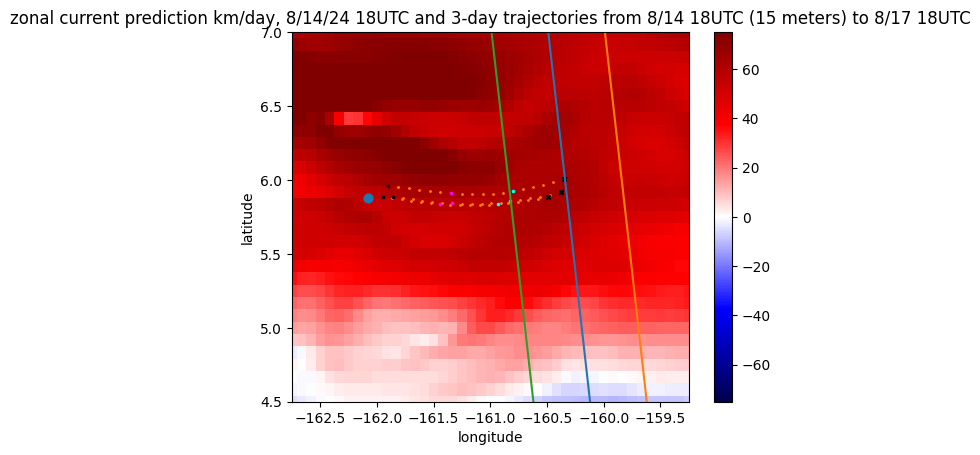

In [15]:
import seaborn as sns
from matplotlib.colors import ListedColormap
colors = sns.mpl_palette('Paired',n_colors=8)
cmap   = sns.mpl_palette('Paired',n_colors=8,as_cmap=True)
plt.pcolormesh(fieldsetF.V.grid.lon, fieldsetF.V.grid.lat, fieldsetF.U.data[0, :, :]*86.4)
plt.set_cmap('seismic')
plt.colorbar()
plt.xlim(-162.75,-159.25)
plt.ylim(4.5,7)
plt.clim(-75,75)
plt.title('zonal current prediction km/day, 8/14/24 18UTC and 3-day trajectories from 8/14 18UTC (15 meters) to 8/17 18UTC')

ds = xr.open_zarr("OSCARparticlesF.zarr")

plt.plot(dsswot.longitude_nadir-360,dsswot.latitude_nadir)
plt.plot(dsswot.longitude_nadir-359.5,dsswot.latitude_nadir)
plt.plot(dsswot.longitude_nadir-360.5,dsswot.latitude_nadir)


plt.scatter(ds.lon[0:3,:],ds.lat[0:3,:],c='#ff7f0e',s=4,marker='.')
plt.scatter(ds.lon[0:3,0],ds.lat[0:3,0],s=10,marker='.',c='k')
plt.scatter(ds.lon[0:3,6],ds.lat[0:3,6],s=10,marker='.',c='magenta')
plt.scatter(ds.lon[0:3,12],ds.lat[0:3,12],s=10,marker='.',c='cyan')
plt.scatter(ds.lon[0:3,17],ds.lat[0:3,17],s=10,marker='x',c='k')

#plt.scatter(j31lon,j31lat,s=4,marker='o',c='grey')


plt.scatter([-162.08],[5.88],s=40,marker='o')
#plt.scatter([-162.05],[5.88],s=40,marker='o')
#plt.scatter([-162.11],[5.88],s=40,marker='o')


plt.ylabel("latitude")
plt.xlabel("longitude")
#plt.scatter(ds1.lon[:,:],ds1.lat[:,:],s=4,c='#ff7f0e',marker='.')

plt.show()
